In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data_rhein_incl_km.csv")
df["Datum"] = pd.to_datetime(df["Datum"]).dt.date

In [4]:
#frames per Station RE and DI
dfRE=df.loc[df['Kürzel'] == "RE"]
dfDI=df.loc[df["Kürzel"] == "DI"]

dfREx=dfRE.set_index(["Datum"])
dfDIx=dfDI.set_index(["Datum"])

df= dfRE.append(dfDI, ignore_index=True, sort=False)
dfx= df.set_index(["Datum"])

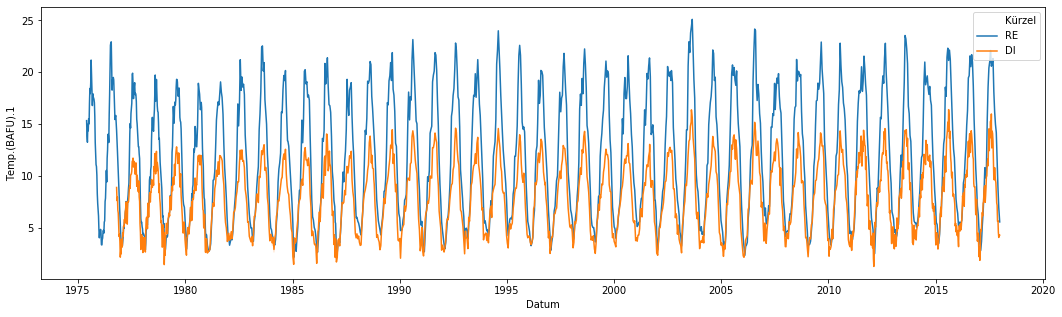

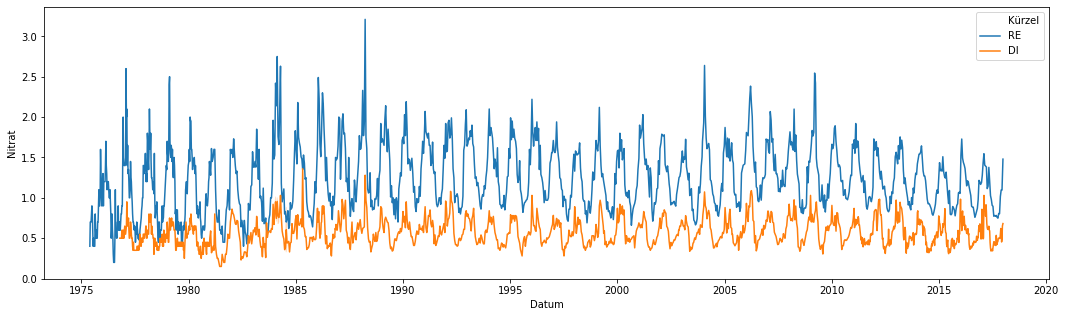

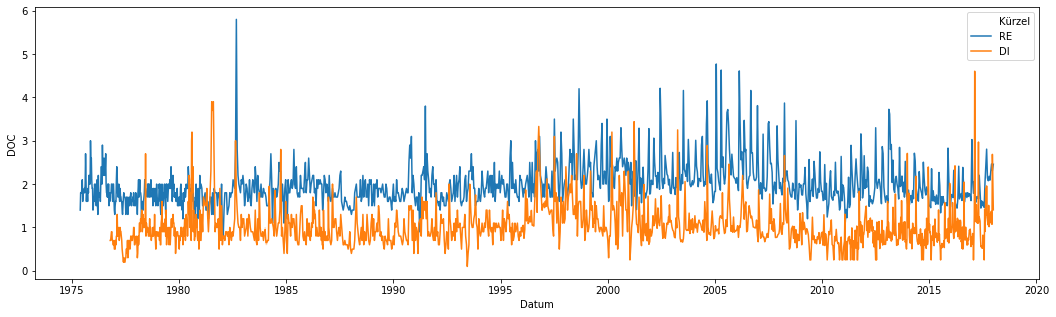

In [48]:
#Temp
plt.figure(figsize=(18,5))
sns.lineplot(x="Datum", y="Temp.(BAFU).1",hue="Kürzel", data=df)

#Nitrat
plt.figure(figsize=(18,5))
sns.lineplot(x="Datum", y="Nitrat",hue="Kürzel", data=df)

#DOC
plt.figure(figsize=(18,5))
sns.lineplot(x="Datum", y="DOC",hue="Kürzel", data=df)

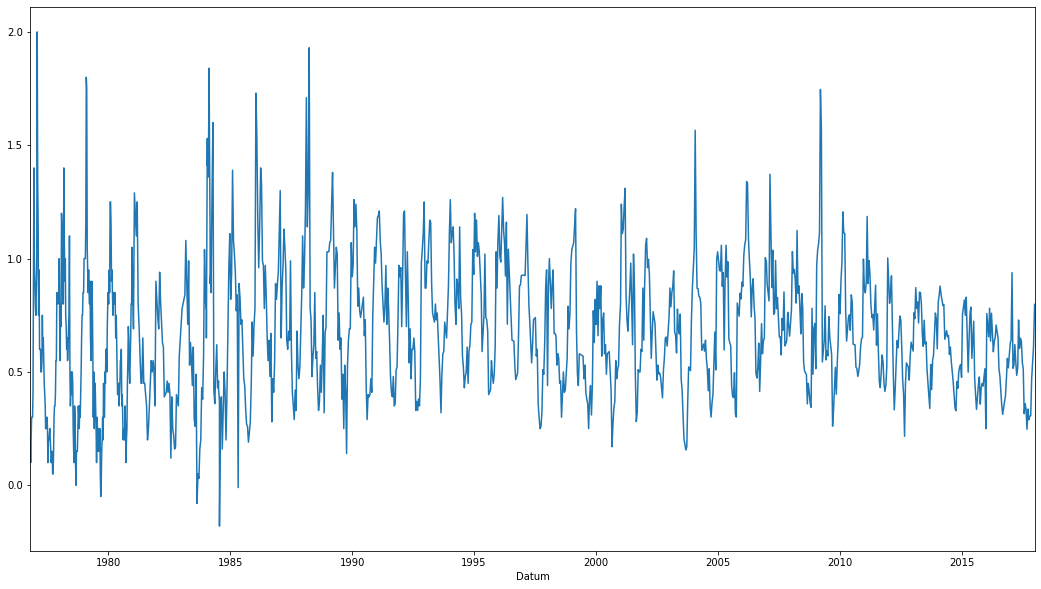

In [46]:
#difference between RE and SI

cols = dfx.columns.drop('Kürzel',"Datum")

dfx[cols] = dfx[cols].apply(pd.to_numeric, errors='coerce')

dfRE=dfx.loc[dfx['Kürzel'] == "RE"]
dfDI=dfx.loc[dfx["Kürzel"] == "DI"]

df_diff=dfRE["Nitrat"]-dfDI["Nitrat"]
decomp=df_diff.dropna(axis=0, how='any')

decomp.plot()

__________

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from dateutil.parser import parse
from pylab import rcParams

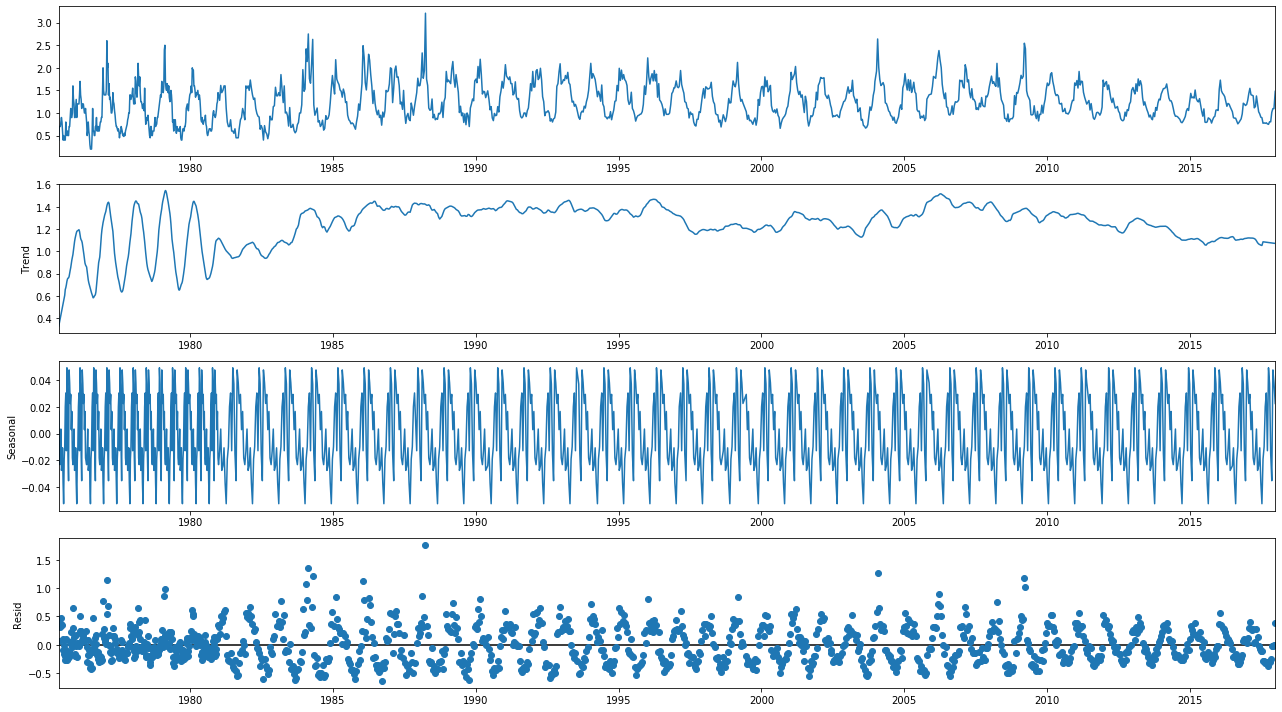

In [35]:
#decompostiitonRE
decomp_RE = dfREx[["Nitrat"]]
decomp_RE=decomp_RE.dropna(axis=0, how='any')

decomposition = seasonal_decompose(decomp_RE, model='additive', extrapolate_trend='freq', period=24)
fig = decomposition.plot()

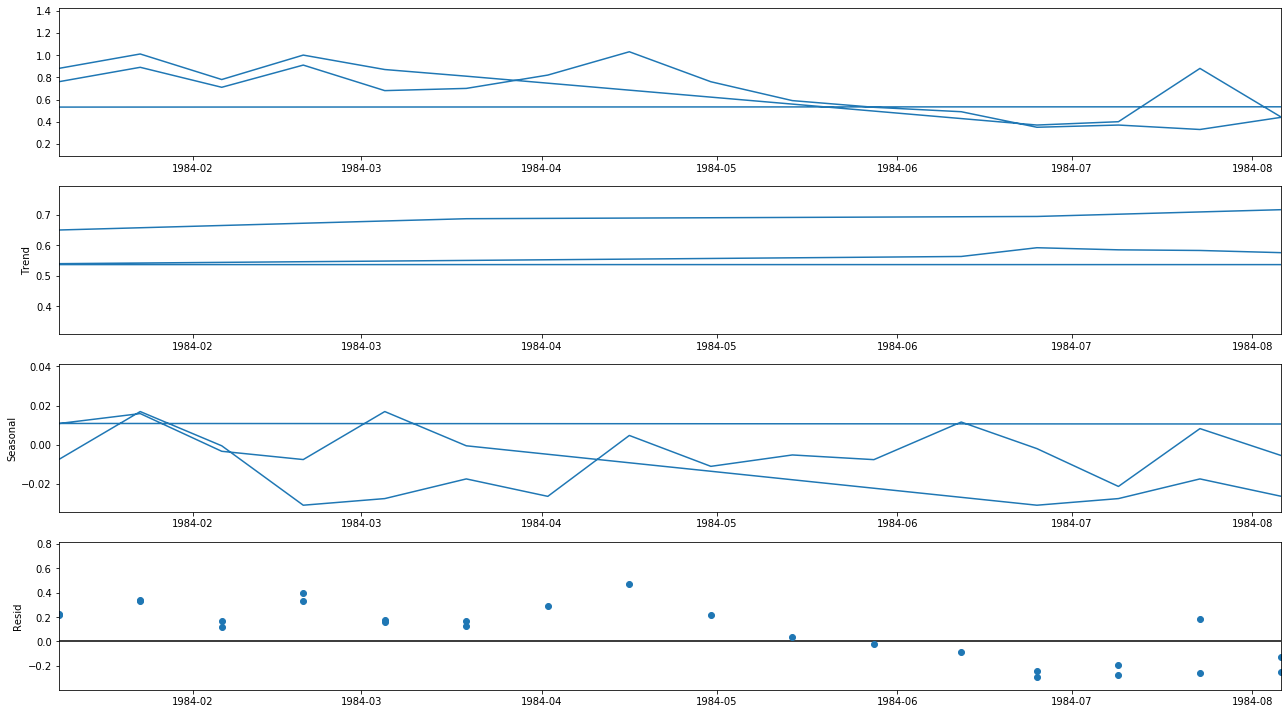

In [36]:
#decompositionDI
decomp_DI = dfDIx[["Nitrat"]]
decomp_DI=decomp_DI.dropna(axis=0, how='any')

decomposition = seasonal_decompose(decomp_DI, model='additive', extrapolate_trend='freq', period=24)
fig = decomposition.plot()